In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from methods import load_data, NeuralNet, loader_eval

c:\Users\ezer6\anaconda3\envs\adl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [3]:
test_loss_per_seed = []
# Non-random versions of the code
for seed in [0, 1, 2, 3, 4]:
    torch.manual_seed(seed)
    train_loader, test_loader = load_data()
    
    # Fully connected neural network with 2 layers
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model
    test_loss_list = []
    for epoch in range(num_epochs):
        # Train
        # model.train()
        train_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Test
        # model.eval()
        test_loss = loader_eval(test_loader, model, criterion)
        test_loss_list.append(test_loss)
# append test_loss for the specific seed
    test_loss_per_seed.append(test_loss_list)



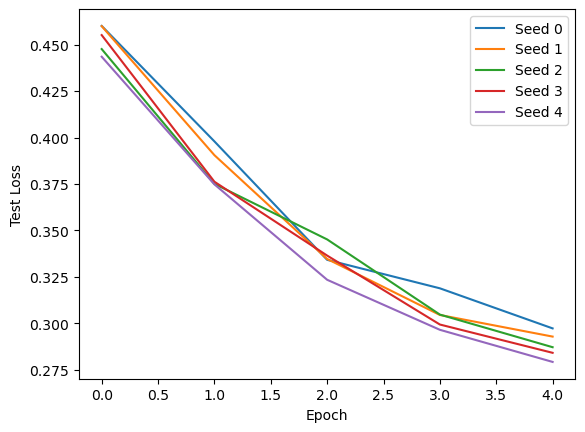

In [4]:
#plot of the test errors during training from the separate runs
plt.figure()
plt.plot(test_loss_per_seed[0], label='Seed 0')
plt.plot(test_loss_per_seed[1], label='Seed 1')
plt.plot(test_loss_per_seed[2], label='Seed 2')
plt.plot(test_loss_per_seed[3], label='Seed 3')
plt.plot(test_loss_per_seed[4], label='Seed 4')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()

In [5]:
# get final errors for each seed
final_errors_per_seed =[test_loss_per_seed[i][-1] for i in range(len(test_loss_per_seed))]

# calculate mean and std
test_error_mean = np.mean(final_errors_per_seed)
test_error_std = np.std(final_errors_per_seed)
print(f'Test error mean: {test_error_mean:.4f}, Test error std: {test_error_std:.4f}')

Test error mean: 0.2882, Test error std: 0.0064
